In [1]:
import sys

# setting path
sys.path.append('../baseline/contrastive-equilibrium-learning/')

In [2]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Embedding size is 512, encoder SAP.
Initialised Uniformity Loss, t=2.0
Initialised AngleContrastive
Initialised network with nOut 512 encoder_type SAP, lambda_u = 1.00, lambda_s = 1.00, t = 2.00


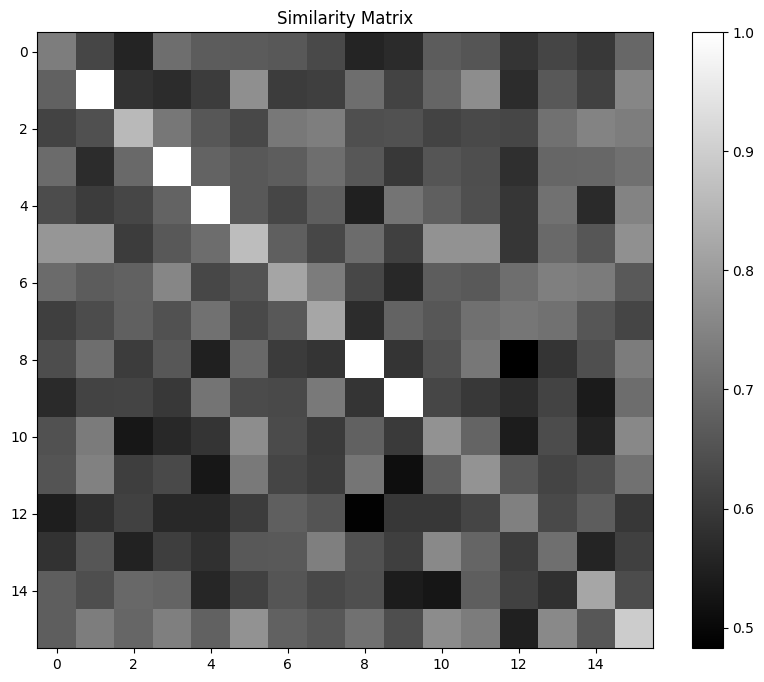

: 

In [ ]:
import os
import random
from scipy.io import wavfile

data_root = '/home/hyeons/workspace/DB/vox1_test/wav/'

# List all folders in the data_root directory
all_folders = [f for f in os.listdir(data_root) if os.path.isdir(os.path.join(data_root, f))]

# Randomly select 16 folders
id_list = random.sample(all_folders, 16)
wav1_list = []
wav2_list = []
for folder_id in id_list:
    # Path to the selected folder
    folder_path = os.path.join(data_root, folder_id)

    # List all subfolders in the selected folder
    subfolders = [f for f in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, f))]

    # Randomly select a subfolder
    if subfolders:
        selected_subfolder = random.choice(subfolders)
        subfolder_path = os.path.join(folder_path, selected_subfolder)

        # List all wave files in the selected subfolder
        wave_files = [f for f in os.listdir(subfolder_path) if f.endswith('.wav')]

        # Randomly select a wave file and load it
        if wave_files:
            selected_wave_file = random.choice(wave_files)
            wave_file_path = os.path.join(subfolder_path, selected_wave_file)
            wav1_list.append(wave_file_path)

            selected_wave_file = random.choice(wave_files)
            wave_file_path = os.path.join(subfolder_path, selected_wave_file)
            wav2_list.append(wave_file_path)

from SpeakerNet import SpeakerNet
import matplotlib.pyplot as plt

model = SpeakerNet(lr = 0.0001, model="ResNetSE34L", nOut = 512, encoder_type = 'SAP', normalize = True, unif_loss='uniform', sim_loss='anglecontrast', lambda_u=1, lambda_s=1, t=2, sample_type='PoN').to(device)
model.loadParameters('../baseline/contrastive-equilibrium-learning/save/pre-trained_unspv_unif-a-prot.model')

# visualize 16 person's similarity in 16 x 16 matrix with vox1_test
sim_matrix = [[0 for i in range(16)] for j in range(16)]
for i, wav1 in enumerate(wav1_list):
    for j, wav2 in enumerate(wav2_list):
        sim = model.get_embedding(wav1, wav2,eval_frames=0, num_eval=10000)
        sim_matrix[i][j] = sim[1].mean().item()

plt.figure(figsize=(10, 8))
plt.imshow(sim_matrix, cmap='gray', interpolation='none')
plt.title('Similarity Matrix')
plt.colorbar() 
plt.show()


Embedding size is 512, encoder SAP.
Initialised Uniformity Loss, t=2.0
Initialised AngleContrastive
Initialised network with nOut 512 encoder_type SAP, lambda_u = 1.00, lambda_s = 1.00, t = 2.00


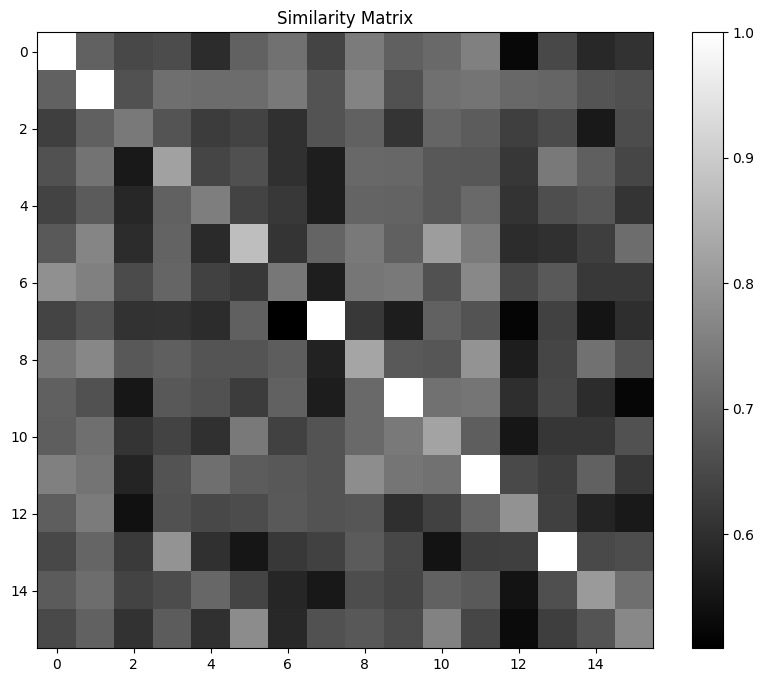

In [5]:
import os
import random
from scipy.io import wavfile

data_root = '/home/hyeons/workspace/DB/vox1_dev/wav/'

# List all folders in the data_root directory
all_folders = [f for f in os.listdir(data_root) if os.path.isdir(os.path.join(data_root, f))]

# Randomly select 16 folders
id_list = random.sample(all_folders, 16)
wav1_list = []
wav2_list = []
for folder_id in id_list:
    # Path to the selected folder
    folder_path = os.path.join(data_root, folder_id)

    # List all subfolders in the selected folder
    subfolders = [f for f in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, f))]

    # Randomly select a subfolder
    if subfolders:
        selected_subfolder = random.choice(subfolders)
        subfolder_path = os.path.join(folder_path, selected_subfolder)

        # List all wave files in the selected subfolder
        wave_files = [f for f in os.listdir(subfolder_path) if f.endswith('.wav')]

        # Randomly select a wave file and load it
        if wave_files:
            selected_wave_file = random.choice(wave_files)
            wave_file_path = os.path.join(subfolder_path, selected_wave_file)
            wav1_list.append(wave_file_path)

            selected_wave_file = random.choice(wave_files)
            wave_file_path = os.path.join(subfolder_path, selected_wave_file)
            wav2_list.append(wave_file_path)

from SpeakerNet import SpeakerNet
import matplotlib.pyplot as plt

model = SpeakerNet(lr = 0.0001, model="ResNetSE34L", nOut = 512, encoder_type = 'SAP', normalize = True, unif_loss='uniform', sim_loss='anglecontrast', lambda_u=1, lambda_s=1, t=2, sample_type='PoN').to(device)
model.loadParameters('../baseline/contrastive-equilibrium-learning/save/pre-trained_unspv_unif-a-prot.model')

# visualize 16 person's similarity in 16 x 16 matrix with vox1_test
sim_matrix = [[0 for i in range(16)] for j in range(16)]
for i, wav1 in enumerate(wav1_list):
    for j, wav2 in enumerate(wav2_list):
        sim = model.get_embedding(wav1, wav2,eval_frames=0, num_eval=10000)
        sim_matrix[i][j] = sim[1].mean().item()

plt.figure(figsize=(10, 8))
plt.imshow(sim_matrix, cmap='gray', interpolation='none')
plt.title('Similarity Matrix')
plt.colorbar() 
plt.show()


NameError: name 'all_folders' is not defined

In [6]:
import os
import random
from scipy.io import wavfile

data_root = '/home/hyeons/workspace/DB/vox1_dev/wav/'

# List all folders in the data_root directory
all_folders = [f for f in os.listdir(data_root) if os.path.isdir(os.path.join(data_root, f))]

# Randomly select 16 folders
# id_list = random.sample(all_folders, 16)
wav1_list = []
wav2_list = []
for folder_id in all_folders:
    # Path to the selected folder
    folder_path = os.path.join(data_root, folder_id)

    # List all subfolders in the selected folder
    subfolders = [f for f in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, f))]

    # Randomly select a subfolder
    if subfolders:
        selected_subfolder = random.choice(subfolders)
        subfolder_path = os.path.join(folder_path, selected_subfolder)

        # List all wave files in the selected subfolder
        wave_files = [f for f in os.listdir(subfolder_path) if f.endswith('.wav')]

        # Randomly select a wave file and load it
        if wave_files:
            selected_wave_file = random.choice(wave_files)
            wave_file_path = os.path.join(subfolder_path, selected_wave_file)
            wav1_list.append(wave_file_path)

            selected_wave_file = random.choice(wave_files)
            wave_file_path = os.path.join(subfolder_path, selected_wave_file)
            wav2_list.append(wave_file_path)

from SpeakerNet import SpeakerNet
import matplotlib.pyplot as plt

model = SpeakerNet(lr = 0.0001, model="ResNetSE34L", nOut = 512, encoder_type = 'SAP', normalize = True, unif_loss='uniform', sim_loss='anglecontrast', lambda_u=1, lambda_s=1, t=2, sample_type='PoN').to(device)
model.loadParameters('../baseline/contrastive-equilibrium-learning/save/pre-trained_unspv_unif-a-prot.model')


len(all_folders)

Embedding size is 512, encoder SAP.
Initialised Uniformity Loss, t=2.0
Initialised AngleContrastive
Initialised network with nOut 512 encoder_type SAP, lambda_u = 1.00, lambda_s = 1.00, t = 2.00


1211

In [15]:
# Path to the file
file_path = 'similarity_pairs.txt'

# Open the file and read line by line
with open('similar_id.txt', 'w') as target_file:
    with open(file_path, 'r') as file:
        for line in file:
            # Remove any whitespace and split by comma
            indices = line.strip().split(',')
            # Convert string to integer
            index1, index2 = int(indices[0].strip('(')), int(indices[1].strip(')'))
            if index1 < index2:
                target_file.write(data_root+all_folders[index1]+'\t' + data_root+all_folders[index2]+ '\n')

            

100%|██████████| 12/12 [00:01<00:00, 10.92it/s]


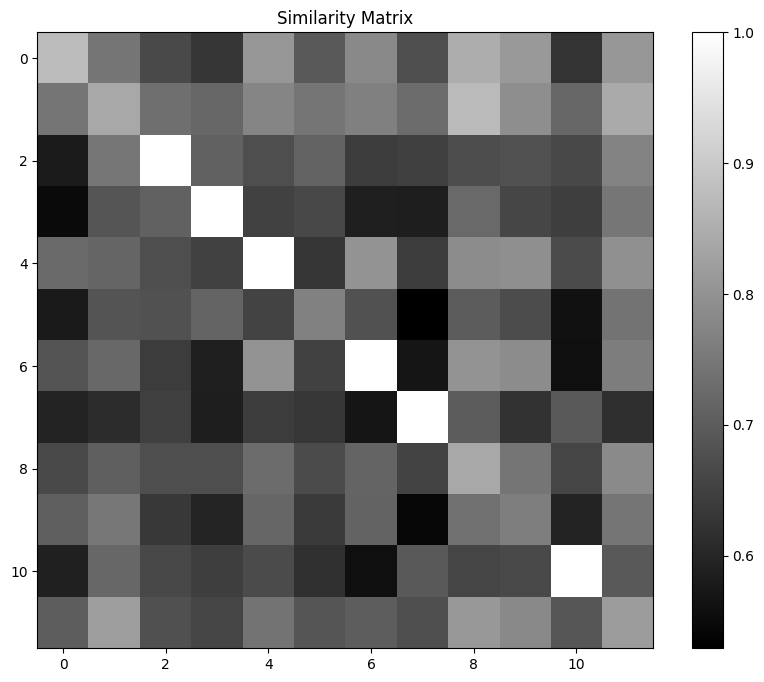

In [26]:
# visualize 16 person's similarity in 1211 x 1211 matrix with vox1_test
from tqdm import trange
sim_matrix = [[0 for i in range(12)] for j in range(12)]
sim_pair = []
for i in trange(12):
    for j in range(12):
        sim = model.get_embedding(wav1_list[i], wav2_list[j],eval_frames=0, num_eval=10)
        sim = sim[1].mean().item() 
        if sim > 0.8:
            sim_pair.append((i, j))

        sim_matrix[i][j] = sim
    
plt.figure(figsize=(10, 8))
plt.imshow(sim_matrix, cmap='gray', interpolation='none')   
plt.title('Similarity Matrix')
plt.colorbar() 
plt.show()

with open('similarity_pairs2.txt', 'w') as file:
    for pair in sim_pair:
        file.write(f'{pair}\n')


In [14]:
with open('fine_tune.txt', 'w') as target_file:
    with open('similar_id.txt' , 'r') as source_file:
        unique_ids = set()
        for line in source_file:
            parts = line.strip().split('\t')
            for part in parts:
                id = part.split('/')[-1]
                unique_ids.add(id)
                # print(id)
                if len(unique_ids) == 32:
                    target_file.write(' '.join(unique_ids) + '\n')
                    unique_ids = set()
                    break

id10092
id10226
id10092
id11066
id10092
id11131
id10092
id10500
id10092
id10263
id10092
id10722
id10092
id10795
id10092
id10615
id10092
id10602
id10092
id10715
id10092
id10572
id10092
id11146
id10092
id10359
id10092
id10666
id10092
id10725
id10092
id10241
id10092
id11085
id10092
id11201
id10092
id10471
id10092
id11089
id10092
id11005
id10092
id10767
id10092
id10479
id10092
id10013
id10092
id10472
id10092
id11023
id10092
id10628
id10092
id10863
id10092
id11082
id10092
id10074
id10092
id10125
id10092
id10006
id10092
id10648
id10092
id11032
id10092
id11078
id10092
id11155
id10092
id10141
id10092
id10590
id10092
id10229
id10092
id10072
id10092
id10629
id10092
id10609
id10092
id10316
id10092
id11091
id10092
id10655
id10092
id10798
id10092
id10575
id10092
id10743
id10092
id10032
id10092
id10705
id10092
id10716
id10092
id10849
id10092
id11076
id10092
id11081
id10092
id10933
id10092
id10890
id10092
id11189
id10092
id10145
id10092
id10687
id10092
id10819
id10092
id10851
id10092
id11160
id10092
